In [ ]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Database + Ajuste

In [ ]:
url = 'https://raw.githubusercontent.com/Mirlaa/Clusterizacao-dados-sem-rotulo/main/Dados/dados_mkt.csv'

df = pd.read_csv(url, header=0)
df.head()

,sexo,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,...,musica,rock,cabelo,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas
0,F,27,49,0,0,10,0,0,10,0,...,0,0,0,0,0,0,0,0,0,10
1,F,27,41,0,0,0,0,0,0,0,...,10,20,40,0,10,0,0,0,0,10
2,F,26,1,0,0,0,0,0,10,0,...,10,0,50,0,0,0,30,0,0,0
3,M,28,32,0,50,0,0,0,0,0,...,10,10,0,0,0,0,0,0,0,0
4,M,28,18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12992 entries, 0 to 12991
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sexo               12992 non-null  object
 1   idade              12992 non-null  int64 
 2   numero_de_amigos   12992 non-null  int64 
 3   basquete           12992 non-null  int64 
 4   futebol_americano  12992 non-null  int64 
 5   futebol            12992 non-null  int64 
 6   softbol            12992 non-null  int64 
 7   voleibol           12992 non-null  int64 
 8   natacao            12992 non-null  int64 
 9   animacao           12992 non-null  int64 
 10  beisebol           12992 non-null  int64 
 11  tenis              12992 non-null  int64 
 12  esportes           12992 non-null  int64 
 13  fofo               12992 non-null  int64 
 14  danca              12992 non-null  int64 
 15  banda              12992 non-null  int64 
 16  marcha             12992 non-null  int64

In [ ]:
#aplicando OneHotEncoder

encoder = OneHotEncoder(categories=[['F', 'M', 'NE']],sparse_output=False)
encoded_sexo = encoder.fit_transform(df[['sexo']])

encoded_df = pd.DataFrame(encoded_sexo, columns=encoder.get_feature_names_out(['sexo']))
dados = pd.concat([df, encoded_df],axis=1).drop('sexo',axis=1) #axis=1 porque a relação é entre colunas

dados.head()

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
0,27,49,0,0,10,0,0,10,0,0,...,0,0,0,0,0,0,10,1.0,0.0,0.0
1,27,41,0,0,0,0,0,0,0,10,...,0,10,0,0,0,0,10,1.0,0.0,0.0
2,26,1,0,0,0,0,0,10,0,0,...,0,0,0,30,0,0,0,1.0,0.0,0.0
3,28,32,0,50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,28,18,0,0,0,0,0,0,0,0,...,0,0,0,10,0,0,0,0.0,1.0,0.0


In [ ]:
#Salvando o encoder
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

#Modelo K-Means

In [ ]:
random_seed = 45

mod_kmeans = KMeans(n_clusters=2, random_state=random_seed)
model = mod_kmeans.fit(dados)

In [ ]:
#Valor de inércia -  ideia é quanto menor, melhor.
mod_kmeans.inertia_ #Valores muito distântes.

24912957.594588462

In [ ]:
#Valor de silhueta - Permite avaliar a separação e coesão do cluster
silhouette_score(dados, mod_kmeans.predict(dados)) #quanto mais próximo de 1, melhor.

np.float64(0.3799715886302017)

In [ ]:
#Com esses resultados, entendemos que o número de clusters avaliados não é o ideal. Portanto, vamos construir uma função para avaliar diferentes números de clusters.

def avaliacao(dados):
  inercia = []
  silhueta = []

  for k in range(2,21):
    kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
    kmeans.fit(dados)
    inercia.append(kmeans.inertia_)
    silhueta.append(f'k={k} - '+ str(silhouette_score(dados, kmeans.predict(dados))))
  return silhueta, inercia

In [ ]:
silhueta, inercia = avaliacao(dados)
silhueta

['k=2 - 0.3799715886302017',
 'k=3 - 0.2631947012216279',
 'k=4 - 0.27497370057197046',
 'k=5 - 0.2762790287828939',
 'k=6 - 0.2814107923103627',
 'k=7 - 0.19566339131554092',
 'k=8 - 0.12271514125212872',
 'k=9 - 0.1281093701405103',
 'k=10 - 0.13020718009107704',
 'k=11 - 0.13209306347804026',
 'k=12 - 0.09015815350273831',
 'k=13 - 0.09002551845716941',
 'k=14 - 0.08959066111262458',
 'k=15 - 0.09427696863257996',
 'k=16 - 0.09552364235312874',
 'k=17 - 0.09543714624178481',
 'k=18 - 0.08844412672288283',
 'k=19 - 0.0844173588143633',
 'k=20 - 0.08484109789709748']

In [ ]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def graf_silhueta (n_clusters, dados):

    # Aplica o KMeans ao conjunto de dados
    kmeans = KMeans(n_clusters=n_clusters, random_state=45, n_init = 'auto')
    cluster_previsoes = kmeans.fit_predict(dados)

    # Calcula o silhouette score médio
    silhueta_media = silhouette_score(dados, cluster_previsoes)
    print(f'Valor médio para {n_clusters} clusters: {silhueta_media:.3f}')

    # Calcula a pontuação de silhueta para cada amostra
    silhueta_amostra = silhouette_samples(dados, cluster_previsoes)

    # Configuração da figura para o gráfico de silhueta
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    # Limites do gráfico de silhueta
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(dados) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhueta_amostra = silhueta_amostra[cluster_previsoes == i]
        ith_cluster_silhueta_amostra.sort()

        tamanho_cluster_i = ith_cluster_silhueta_amostra.shape[0]
        y_upper = y_lower + tamanho_cluster_i

        cor = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhueta_amostra,
            facecolor=cor, edgecolor=cor, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 para o espaço entre gráficos

    # Linha vertical para a média do Silhouette Score
    ax1.axvline(x=silhueta_media, color='red', linestyle='--')

    ax1.set_title(f'Gráfico da Silhueta para {n_clusters} clusters')
    ax1.set_xlabel('Valores do coeficiente de silhueta')
    ax1.set_ylabel('Rótulo do cluster')

    ax1.set_yticks([])  # Remove os ticks do eixo y
    ax1.set_xticks([i/10.0 for i in range(-1, 11)])

    plt.show()

Valor médio para 2 clusters: 0.380


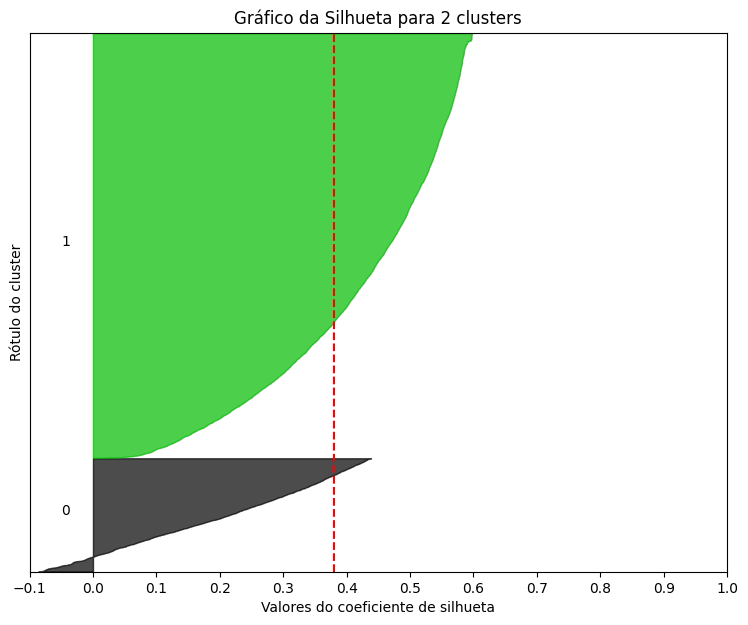

In [ ]:
graf_silhueta(2,dados)

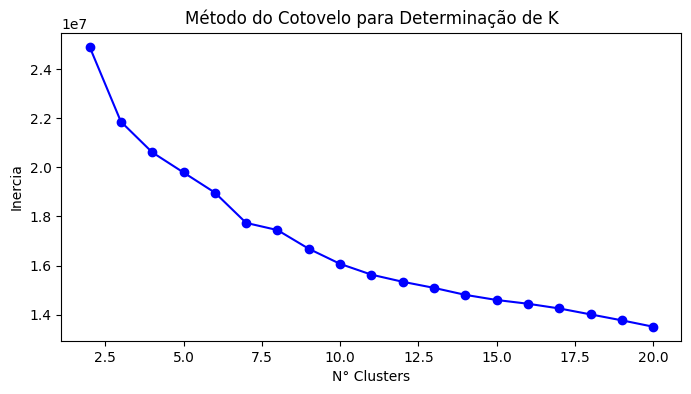

In [ ]:
#Método do cotovelo - plotar os valores de inercia x n° de clusters para identificar o melhor número de clusters

def plot_cotovelo(inercia):
  plt.figure(figsize=(8,4))
  plt.plot(range(2,21),inercia,'bo-')
  plt.xlabel('N° Clusters')
  plt.ylabel('Inercia')
  plt.title('Método do Cotovelo para Determinação de K')

  plt.show()

plot_cotovelo(inercia)

#Normalização de Dados

In [ ]:
dados.describe()

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
count,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,...,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000
mean,26.852679,31.283790,3.063424,2.927186,2.536946,1.836515,1.641010,1.548645,1.207666,1.198430,...,1.340055,2.977986,4.094828,1.720289,0.819735,0.589594,1.050647,0.761469,0.166256,0.072275
std,1.203746,35.891178,8.374443,7.431099,9.810703,7.881526,6.818708,5.862203,5.376673,5.558905,...,4.934874,7.479126,7.670547,5.092112,3.799795,2.999547,4.492218,0.426202,0.372325,0.258953
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,27.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,28.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,30.000000,605.000000,220.000000,90.000000,220.000000,170.000000,140.000000,310.000000,80.000000,140.000000,...,70.000000,120.000000,110.000000,80.000000,80.000000,80.000000,80.000000,1.000000,1.000000,1.000000


In [ ]:
scaler = MinMaxScaler()

dados_scaler = scaler.fit_transform(dados)

dados_normalizados = pd.DataFrame(dados_scaler, columns=dados.columns)

dados_normalizados.describe()

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
count,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,...,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000,12992.000000
mean,0.650298,0.051709,0.013925,0.032524,0.011532,0.010803,0.011721,0.004996,0.015096,0.008560,...,0.019144,0.024817,0.037226,0.021504,0.010247,0.007370,0.013133,0.761469,0.166256,0.072275
std,0.133750,0.059324,0.038066,0.082568,0.044594,0.046362,0.048705,0.018910,0.067208,0.039706,...,0.070498,0.062326,0.069732,0.063651,0.047497,0.037494,0.056153,0.426202,0.372325,0.258953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.555556,0.008264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.666667,0.034711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.777778,0.074380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [ ]:
silhueta, inercia = avaliacao(dados_normalizados)
silhueta

['k=2 - 0.6684575483061145',
 'k=3 - 0.744750087531752',
 'k=4 - 0.3053068053389539',
 'k=5 - 0.30744468106290657',
 'k=6 - 0.3112387030023554',
 'k=7 - 0.3085860859611098',
 'k=8 - 0.319777962428703',
 'k=9 - 0.22706218374995074',
 'k=10 - 0.22472400849594523',
 'k=11 - 0.22798574383673695',
 'k=12 - 0.22555027549760792',
 'k=13 - 0.16185795333037284',
 'k=14 - 0.16298650173075177',
 'k=15 - 0.165522543693859',
 'k=16 - 0.16673895280846962',
 'k=17 - 0.1638428224739627',
 'k=18 - 0.1652194328832505',
 'k=19 - 0.16528102868680855',
 'k=20 - 0.15001075044221607']

Valor médio para 3 clusters: 0.745


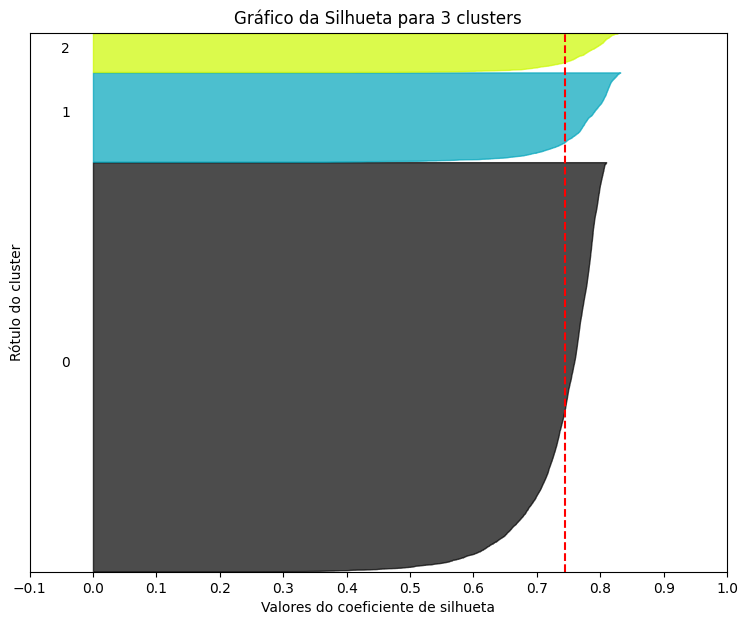

In [ ]:
graf_silhueta(3, dados_normalizados)

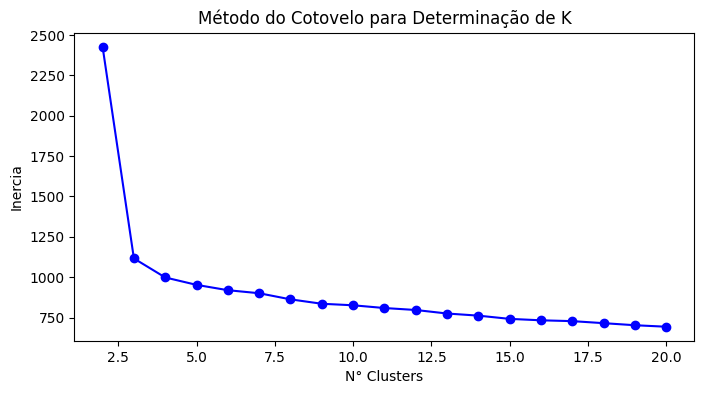

In [ ]:
plot_cotovelo(inercia)
#Modelo melhor, visto que há uma quebra no gráfico.

In [ ]:
modelo_kmeans = KMeans(n_clusters=3, random_state=45, n_init='auto')
modelo_kmeans.fit(dados_normalizados)

KMeans(n_clusters=3, random_state=45)

In [ ]:
joblib.dump(modelo_kmeans, 'kmeans.pkl')

['kmeans.pkl']

#Analisando Clusters

In [ ]:
dados_analise = pd.DataFrame()

dados_analise[dados_normalizados.columns] = scaler.inverse_transform(dados_normalizados)

dados_analise

,idade,numero_de_amigos,basquete,futebol_americano,futebol,softbol,voleibol,natacao,animacao,beisebol,...,vestido,shopping,compras,roupas,nossa_marca,marca_concorrente,bebidas,sexo_F,sexo_M,sexo_NE
0,27.0,49.0,0.0,0.0,10.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
1,27.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,10.0,0.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
2,26.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,30.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28.0,32.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12987,26.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0
12988,26.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12989,27.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12990,27.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
dados_analise['cluster'] = modelo_kmeans.labels_

In [ ]:
cluster_media = dados_analise.groupby('cluster').mean()

cluster_media.T

cluster,0,1,2
idade,26.787830,27.031944,27.123536
numero_de_amigos,32.382796,26.173611,31.460064
basquete,2.959668,3.763889,2.545261
futebol_americano,2.462347,5.347222,2.257721
futebol,2.567472,2.592593,2.087327
softbol,2.273325,0.097222,1.235357
voleibol,1.935712,0.453704,1.267306
natacao,1.693116,0.976852,1.341853
animacao,1.441423,0.092593,1.309904
beisebol,0.792480,3.231481,0.798722


In [ ]:
cluster_media = cluster_media.transpose()

cluster_media.columns = [0,1,2]

In [ ]:
cluster_media[0].sort_values(ascending=False)

,0
numero_de_amigos,32.382796
idade,26.787830
musica,8.541393
cabelo,5.626200
danca,5.463459
compras,4.943900
fofo,4.413221
banda,3.368038
shopping,3.260892
basquete,2.959668


In [ ]:
cluster_media[1].sort_values(ascending=False)

,1
idade,27.031944
numero_de_amigos,26.173611
musica,8.180556
futebol_americano,5.347222
banda,4.120370
basquete,3.763889
beisebol,3.231481
rock,3.148148
futebol,2.592593
danca,2.578704


In [ ]:
cluster_media[2].sort_values(ascending=False)

,2
numero_de_amigos,31.460064
idade,27.123536
musica,7.103301
danca,4.749734
cabelo,4.345048
fofo,3.642173
compras,3.365282
shopping,3.045793
banda,2.758253
basquete,2.545261
